In [1]:
#import library
import numpy as np
import pandas as pd #dataframe operation
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

## Deskripsi Dataset
- Private: Apakah univ. ini swasta atau bukan.
- Apps: Pendaftar univ. tahun ini
- Accept: Jumlah orang yang diterima
- Enroll: Jumlah orang yang terdaftar sebagai mahasiswa
- Top10perc: Persentase mahasiswa yang merupakan top 10% dari SMA asal
- Top25perc: Persentase mahasiswa yang merupakan top 25% dari SMA asal
- F.Undergrad: Jumlah mahasiswa S1 full time
- P.Undergrad: Jumlah mahasiswa S1 part time
- Outstate: Biaya kuliah untuk mahasiswa non-lokal (yang bukan berasal dari negara bagian tersebut)
- Room.Board: Biaya asrama
- Books: Estimasi biaya buku
- Personal: Estimasi biaya hidup
- PhD: Persentase dosen bergelar doktor
- Terminal: Persentase dosen yang memiliki gelar tertinggi di bidang masing-masing
- S.F.Ratio: Rasio mahasiswa/pengajar
- perc.alumni: Persentase alumni yang berdonasi untuk universitas
- Expend: Estimasi biaya pembelajaran per siswa
- Grad.Rate: Tingkat kelulusan


In [2]:
df = pd.read_csv('College.csv')
df.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [3]:
# melihat data secara statistik deksriptif
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [4]:
# cek apakah ada data yg NULL
df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [5]:
# Cek apakah ada data duplikasi
df.duplicated().any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [7]:
df = df.rename(columns={"Unnamed: 0" : "Univ"})
df.head()

Univ Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

## Data Visualization

In [8]:
df_num = df.iloc[:,2:]
df_num.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

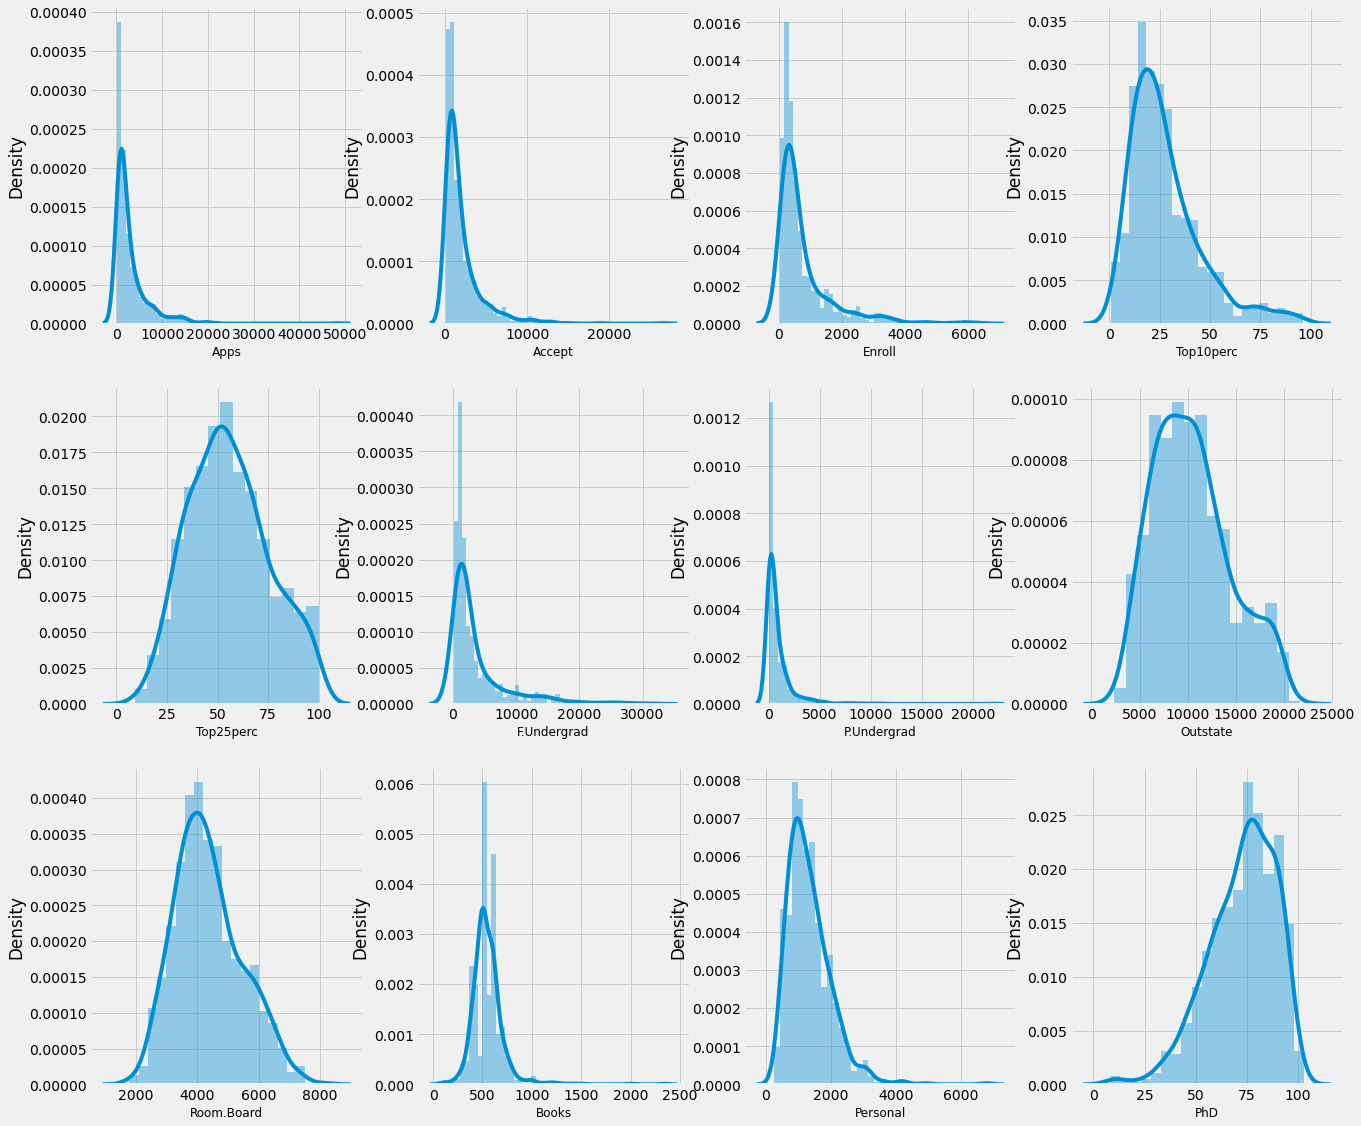

In [9]:
# Membuat Distribusi dari dataset yang bernilai angka
plt.figure(figsize = (20, 25))
feature_num = 1
for i in df_num:
    if feature_num < 13:
        ax = plt.subplot(4, 4, feature_num)
        sns.distplot(df_num[i])
        plt.xlabel(i, fontsize = 12)
        
    feature_num += 1
plt.show()

#### Hasil dari distribusi diatas
Hasil dari distribusi diatas dapat dilihat bahwa yang cukup berdistribusi secara normal adalah
- Top25perc
- Outstate
- Room.Board
yang bernilai skewness positif yaitu 
- Apps
- Accept
- Enroll
- Top10perc
- F.Undergrade
- P.Undergrade
- Books
- Personal
Untuk yang bernilai skewness negatif yaitu
- PhD

**Hasil ini tentunya tidak akan kita manipulasi lebih lanjut**

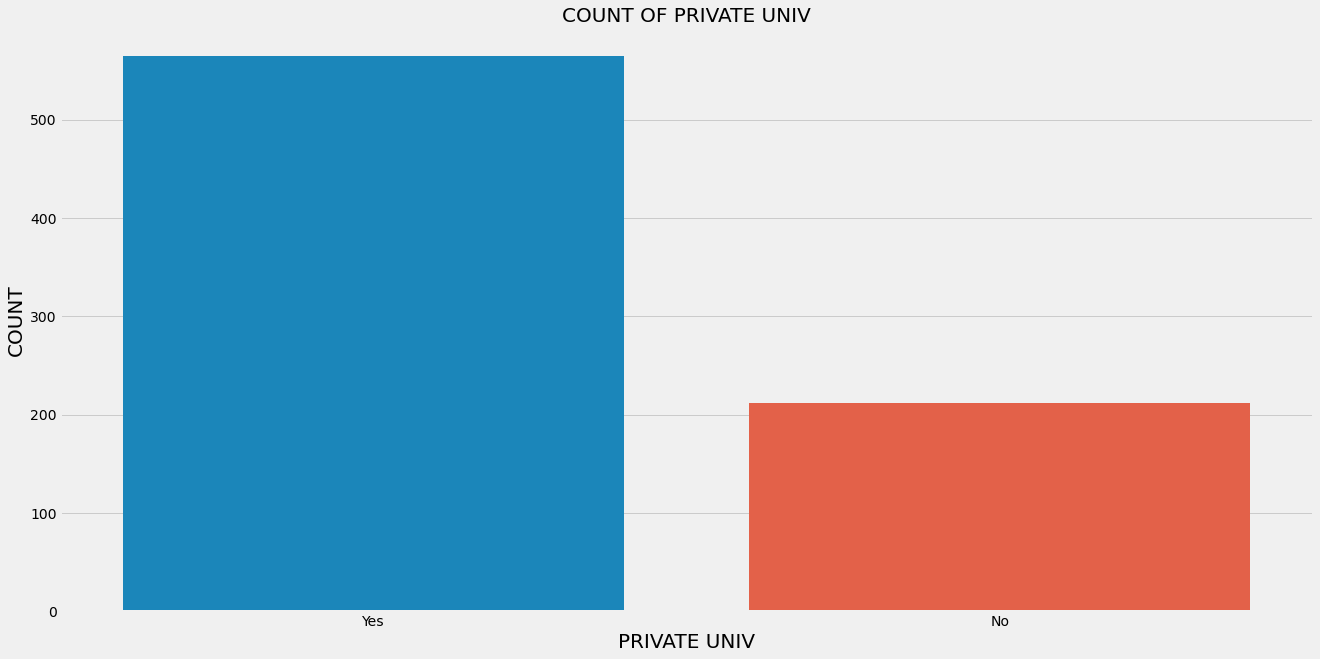

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["Private"])
plt.title("COUNT OF PRIVATE UNIV",fontsize=20)
plt.xlabel("PRIVATE UNIV",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

#### Hasil Countplot
Hasil countplot diatas menunjukkan bahwa perbandingan antara Universitas Swasta dan juga negeri berbanding 1:2

Angka 1 menunjukkan univesitas Swasta, 

Angka 0 menunjukkan universitas negeri

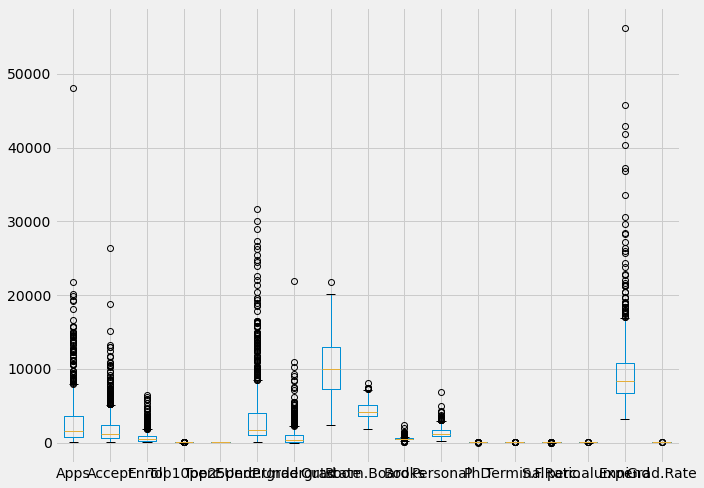

In [11]:
# Mencari Outlier
plt.figure(figsize=(10,7))
df.boxplot()

plt.tight_layout()

#### Hasil boxplot
Hasil boxplot diatas menunjukkan banyaknya outlier hampir dari 10 kolom.
**Namun tentunya hal ini tidak perlu dimanipulasi untuk kepentingan Clustering**

<Figure size 1440x1080 with 0 Axes>

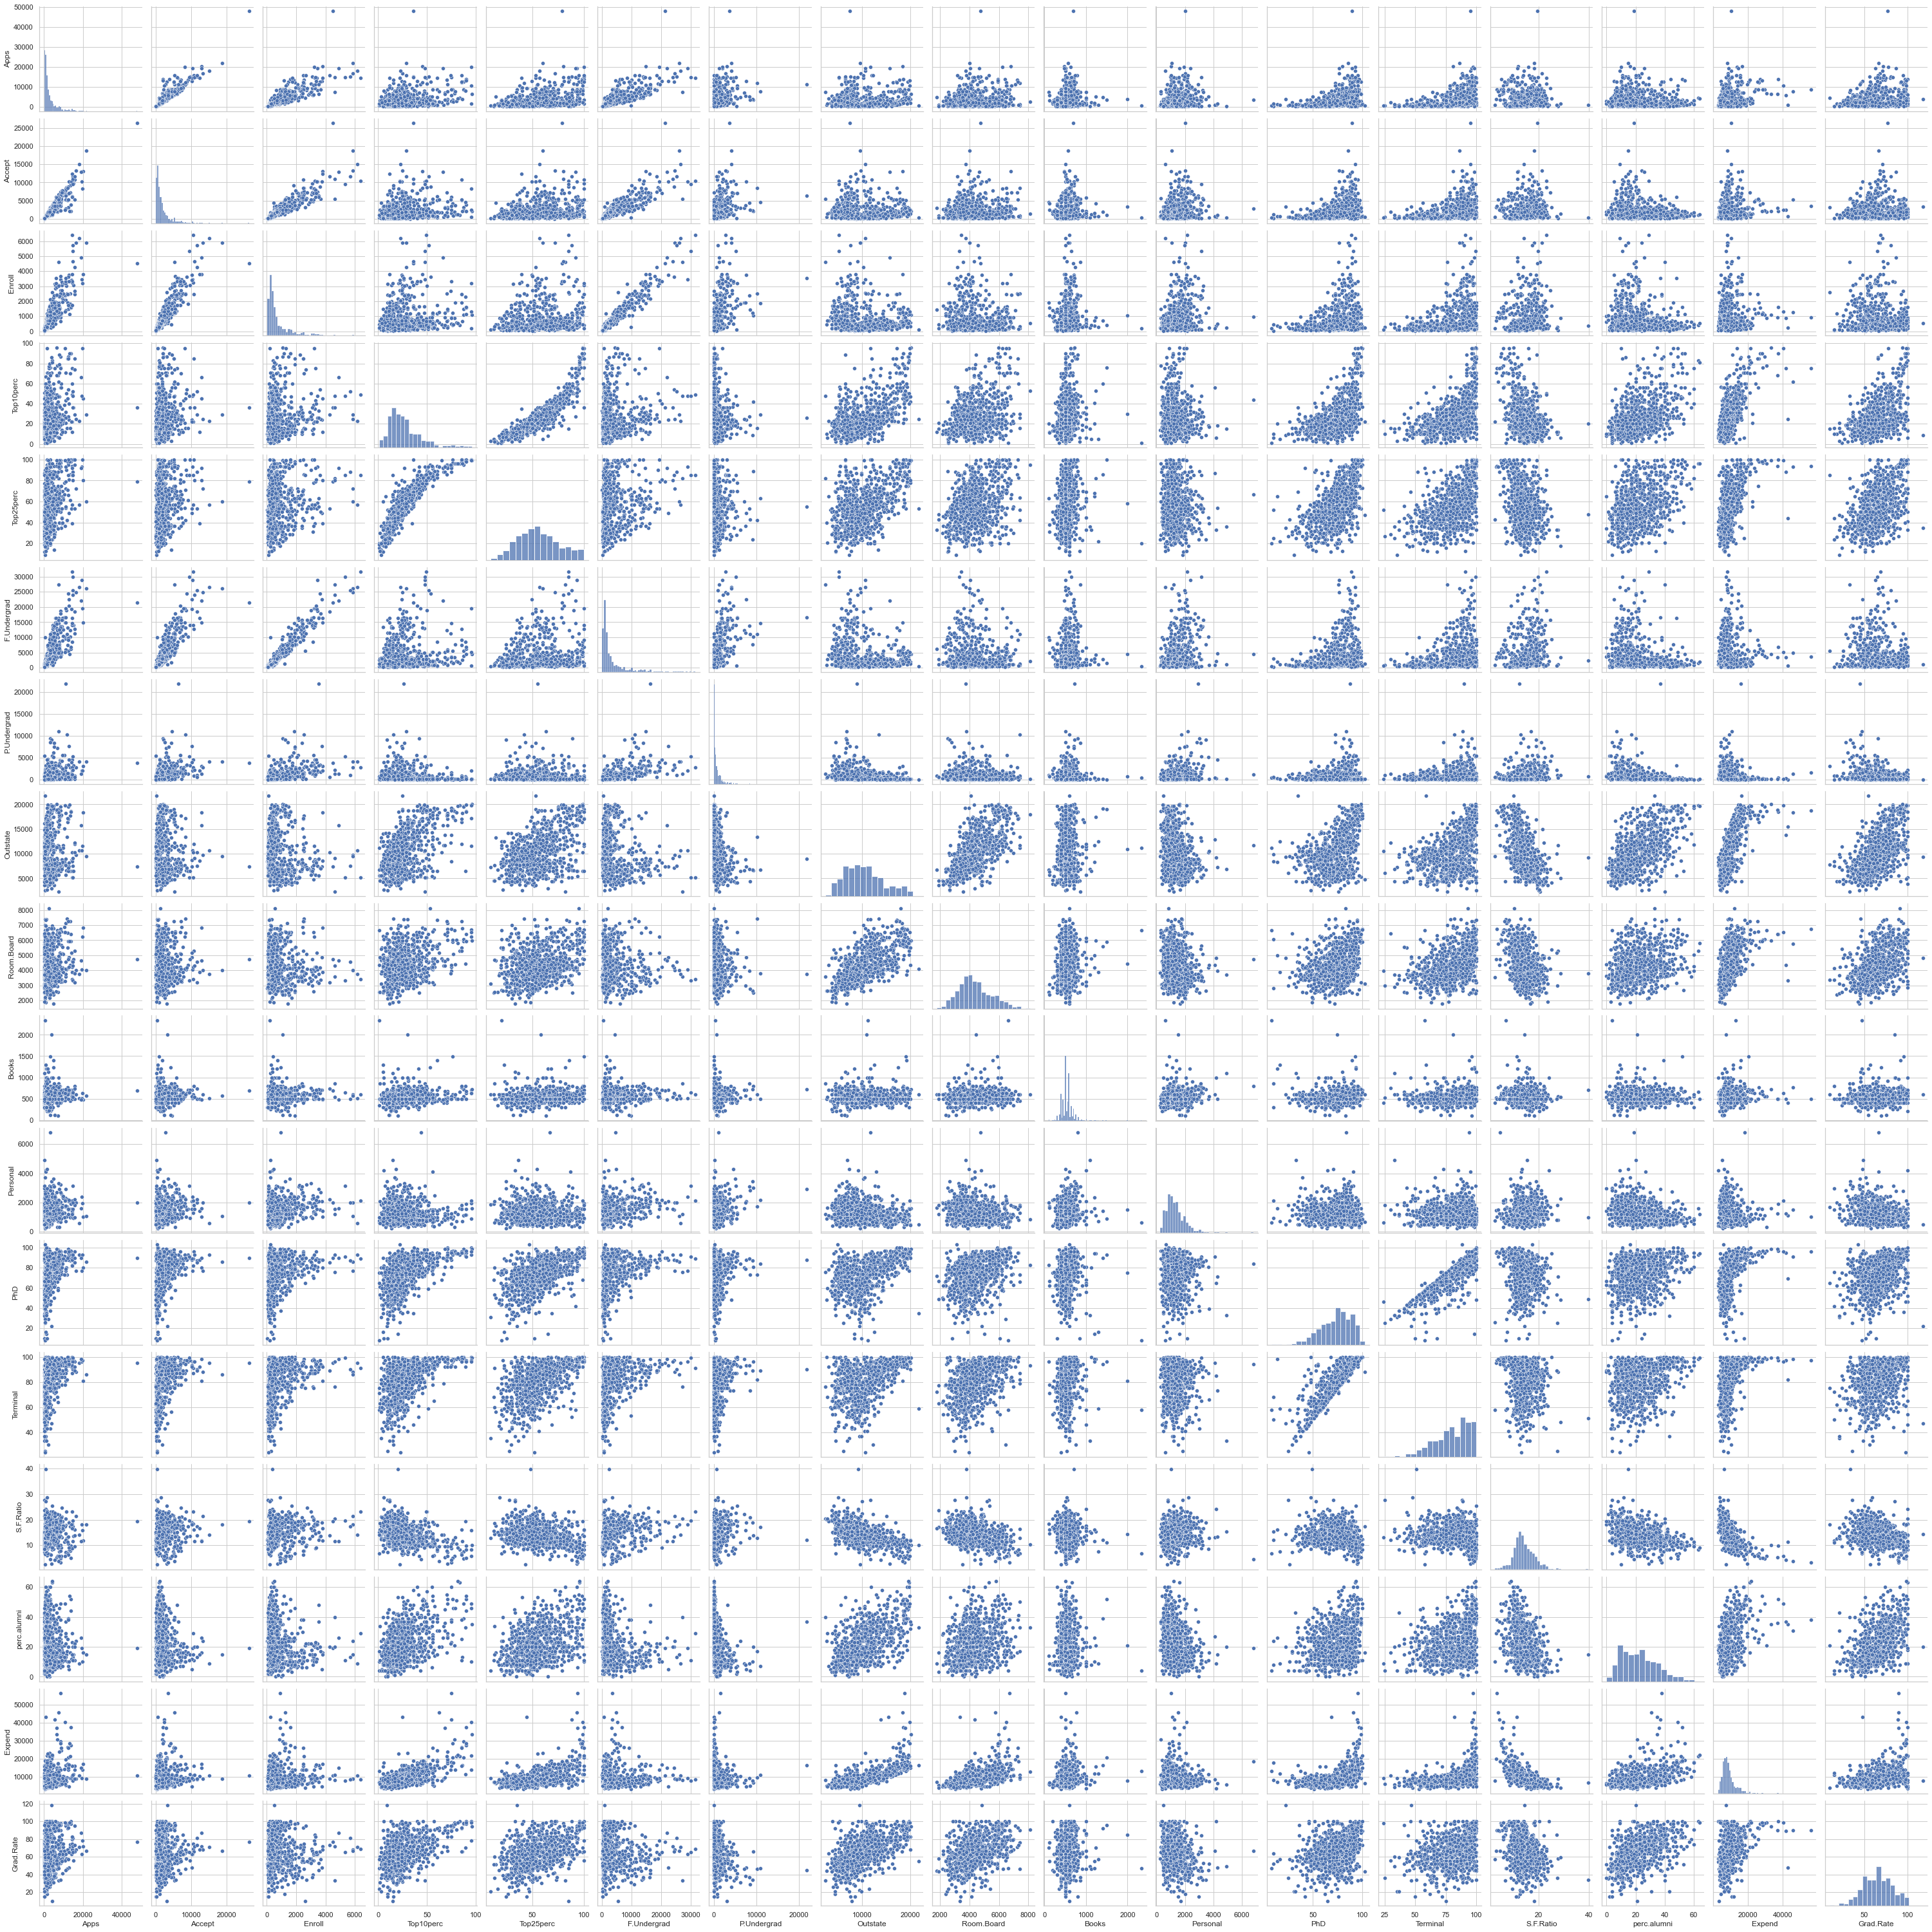

In [12]:
# Melihat hasil hubungan antar kolom dataset
plt.figure(figsize=(20,15))
sns.set(style = 'whitegrid')
sns.pairplot(df.drop(labels=['Univ'],axis=1))
plt.show()

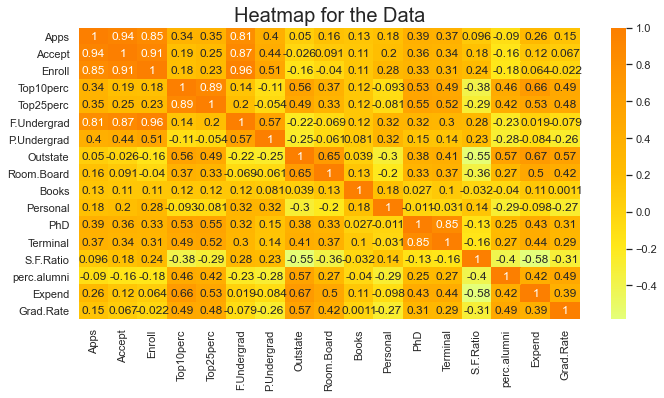

In [13]:
# Melihat hasil hubungan korelasi antar kolom dataset
plt.figure(figsize=(10,5))
sns.heatmap(df.drop(labels=['Univ'],axis=1).corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

#### Hasil Heatmap
Hasil heatmap ini menunjukkan bahwa terdapat korelasi yang tinggi diatas 0.9 yaitu
- Accept
- Enroll
- F.Undergrade
Dalam hal ini sebenarnya bisa di drop dari data, namun untuk pertama saya tidak akan drop. Nanti akan dicoba perbandingannya antara tidak didrop, menggunakan PCA, dan juga di drop

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Univ         777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

## Data Preprocessing

In [15]:
# Mengubah jawaban 'Yes' or 'No' di Kolom Private
df['Private'].replace(['No', 'Yes'],[0,1],inplace=True)

In [16]:
df.head()

Univ  Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University        1  1660    1232     721         23   
1            Adelphi University        1  2186    1924     512         16   
2                Adrian College        1  1428    1097     336         22   
3           Agnes Scott College        1   417     349     137         60   
4     Alaska Pacific University        1   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

## Clustering Analysis

In [17]:
df_cluster= df.drop(columns=['Univ'])
df_cluster

Private   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0          1   1660    1232     721         23         52         2885   
1          1   2186    1924     512         16         29         2683   
2          1   1428    1097     336         22         50         1036   
3          1    417     349     137         60         89          510   
4          1    193     146      55         16         44          249   
..       ...    ...     ...     ...        ...        ...          ...   
772        0   2197    1515     543          4         26         3089   
773        1   1959    1805     695         24         47         2849   
774        1   2097    1915     695         34         61         2793   
775        1  10705    2453    1317         95         99         5217   
776        1   2989    1855     691         28         63         2988   

     P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0            537      7440        3300    450      2200   70        78   
1           1227     12280        6450    750      1500   29        30   
2             99     11250        3750    400      1165   53        66   
3             63     12960        5450    450       875   92        97   
4            869      7560        4120    800      1500   76        72   
..           ...       ...         ...    ...       ...  ...       ...   
772         2029      6797        3900    500      1200   60        60   
773         1107     11520        4960    600      1250   73        75   
774          166      6900        4200    617       781   67        75   
775           83     19840        6510    630      2115   96        96   
776         1726      4990        3560    500      1250   75        75   

     S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0         18.1           12    7041         60  
1         12.2           16   10527         56  
2         12.9           30    8735         54  
3          7.7           37   19016         59  
4         11.9            2   10922         15  
..         ...          ...     ...        ...  
772       21.0           14    4469         40  
773       13.3           31    9189         83  
774       14.4           20    8323         49  
775        5.8           49   40386         99  
776       18.1           28    4509         99  

[777 rows x 18 columns]

## K-Means Algorithm

**Elbow Method to find the number of Optimal Clusters**

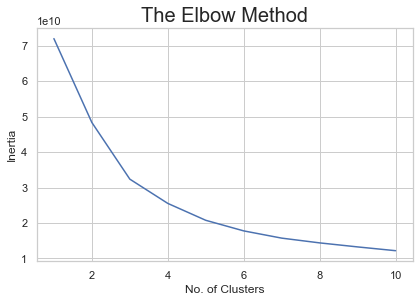

In [18]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(df_cluster)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

plt.show()

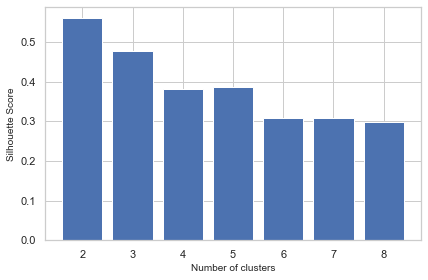

In [19]:
# silhouette coefficient
# standard: -1 s/d 1 => seberapa bagus model mendefinisikan cluster
from sklearn import metrics
silhouette_scores = [] 

for n_cluster in range(2, 9):
    silhouette_scores.append( 
        metrics.silhouette_score(df_cluster, 
                                 KMeans(n_clusters = n_cluster).fit_predict(df_cluster))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

#### Hasil dari Elbow Method dan Sillhoutte Score
hasil diatas menunjukkan bahwa dengan nilai k = 2 mendapatkan score yang tertinggi, untuk itu dicoba nilai k = 2

## Visualizasing Clustering

In [20]:
km = KMeans(n_clusters = 2, random_state = 42)
cluster = km.fit_predict(df_cluster)

In [21]:
# mengetahui posisi centroids
km.cluster_centers_

array([[7.93721973e-01, 1.81323468e+03, 1.28716592e+03, 4.91044843e+02,
        2.53094170e+01, 5.34708520e+01, 2.18854858e+03, 5.95458894e+02,
        1.03957085e+04, 4.31136472e+03, 5.41982063e+02, 1.28033632e+03,
        7.04424514e+01, 7.78251121e+01, 1.40997010e+01, 2.31748879e+01,
        8.93204634e+03, 6.51195815e+01],
       [3.14814815e-01, 1.03631389e+04, 6.55089815e+03, 2.56972222e+03,
        4.14907407e+01, 7.02037037e+01, 1.30619352e+04, 2.46486111e+03,
        1.07191759e+04, 4.64347222e+03, 5.95212963e+02, 1.71420370e+03,
        8.63981481e+01, 9.13333333e+01, 1.40277778e+01, 2.00740741e+01,
        1.41705000e+04, 6.75925926e+01]])

In [22]:
df_cluster = df_cluster
df_cluster['cluster']=cluster

In [23]:
df_cluster

Private   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0          1   1660    1232     721         23         52         2885   
1          1   2186    1924     512         16         29         2683   
2          1   1428    1097     336         22         50         1036   
3          1    417     349     137         60         89          510   
4          1    193     146      55         16         44          249   
..       ...    ...     ...     ...        ...        ...          ...   
772        0   2197    1515     543          4         26         3089   
773        1   1959    1805     695         24         47         2849   
774        1   2097    1915     695         34         61         2793   
775        1  10705    2453    1317         95         99         5217   
776        1   2989    1855     691         28         63         2988   

     P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0            537      7440        3300    450      2200   70        78   
1           1227     12280        6450    750      1500   29        30   
2             99     11250        3750    400      1165   53        66   
3             63     12960        5450    450       875   92        97   
4            869      7560        4120    800      1500   76        72   
..           ...       ...         ...    ...       ...  ...       ...   
772         2029      6797        3900    500      1200   60        60   
773         1107     11520        4960    600      1250   73        75   
774          166      6900        4200    617       781   67        75   
775           83     19840        6510    630      2115   96        96   
776         1726      4990        3560    500      1250   75        75   

     S.F.Ratio  perc.alumni  Expend  Grad.Rate  cluster  
0         18.1           12    7041         60        0  
1         12.2           16   10527         56        0  
2         12.9           30    8735         54        0  
3          7.7           37   19016         59        0  
4         11.9            2   10922         15        0  
..         ...          ...     ...        ...      ...  
772       21.0           14    4469         40        0  
773       13.3           31    9189         83        0  
774       14.4           20    8323         49        0  
775        5.8           49   40386         99        1  
776       18.1           28    4509         99        0  

[777 rows x 19 columns]

In [24]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()
# Create a list of the variables that you need to scale

varlist = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
          'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
# Scale these variables using 'fit_transform'
df_cluster[varlist] = scaler.fit_transform(df_cluster[varlist])

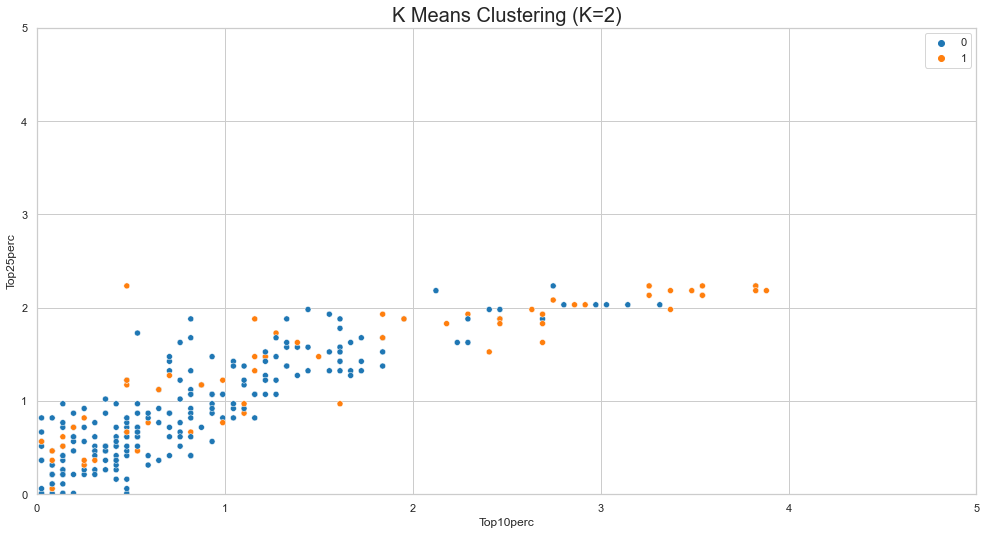

In [25]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_cluster, x='Top10perc',y='Top25perc', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=2)', fontsize = 20)
# visualisasi centroid
plt.scatter(
    km.cluster_centers_[:, 1],
    km.cluster_centers_[:, 2],
    color = 'yellow', marker = '*', s = 200
)
plt.ylim((0,5))
plt.xlim((0,5))
plt.legend()
plt.show()

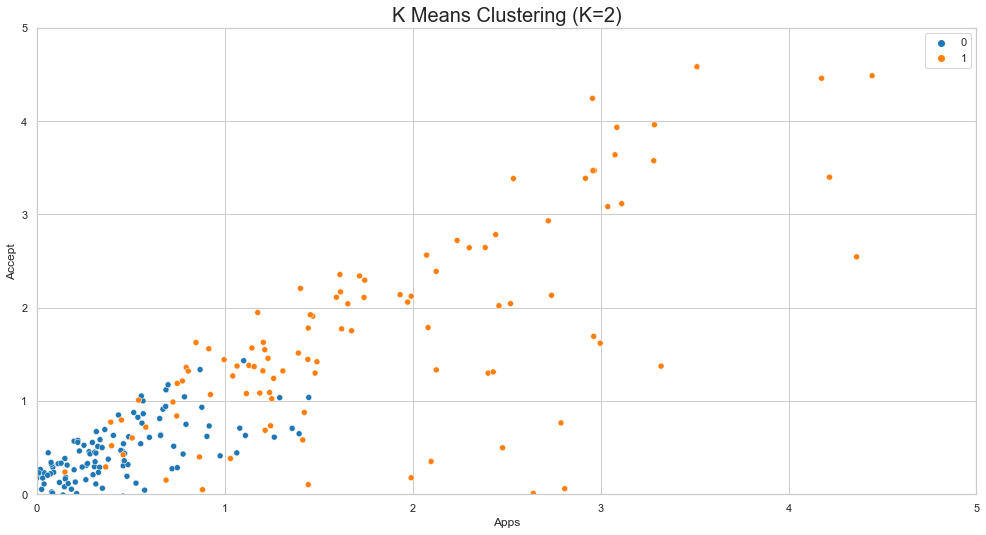

In [26]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_cluster, x='Apps',y='Accept', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=2)', fontsize = 20)
# visualisasi centroid
plt.scatter(
    km.cluster_centers_[:, 1],
    km.cluster_centers_[:, 2],
    color = 'yellow', marker = '*', s = 300
)
plt.ylim((0,5))
plt.xlim((0,5))
plt.legend()
plt.show()

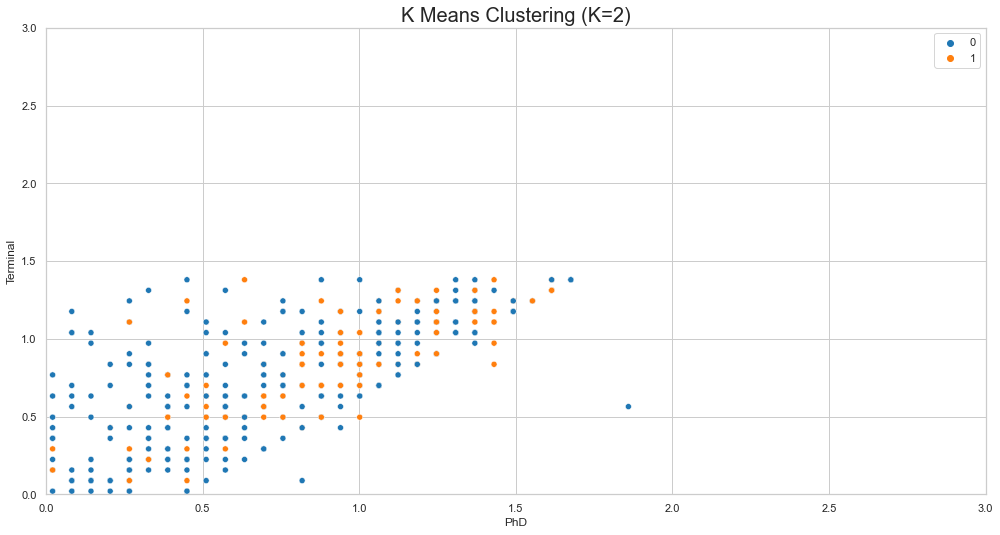

In [27]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_cluster, x='PhD',y='Terminal', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=2)', fontsize = 20)
# visualisasi centroid
plt.scatter(
    km.cluster_centers_[:, 1],
    km.cluster_centers_[:, 2],
    color = 'yellow', marker = '*', s = 200
)
plt.ylim((0,3))
plt.xlim((0,3))
plt.legend()
plt.show()

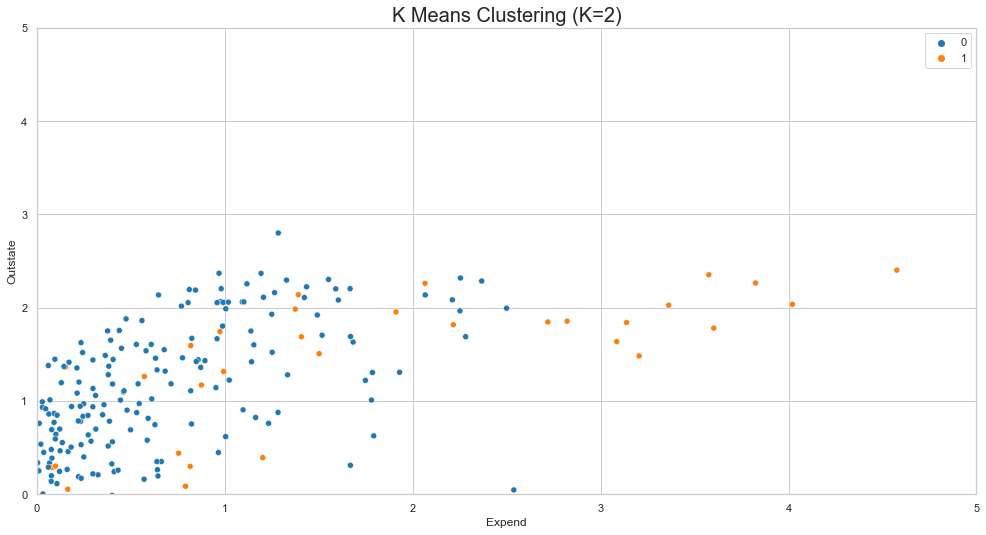

In [28]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_cluster, x='Expend',y='Outstate', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=2)', fontsize = 20)
# visualisasi centroid
plt.scatter(
    km.cluster_centers_[:, 1],
    km.cluster_centers_[:, 2],
    color = 'yellow', marker = '*', s = 300
)
plt.ylim((0,5))
plt.xlim((0,5))
plt.legend()
plt.show()

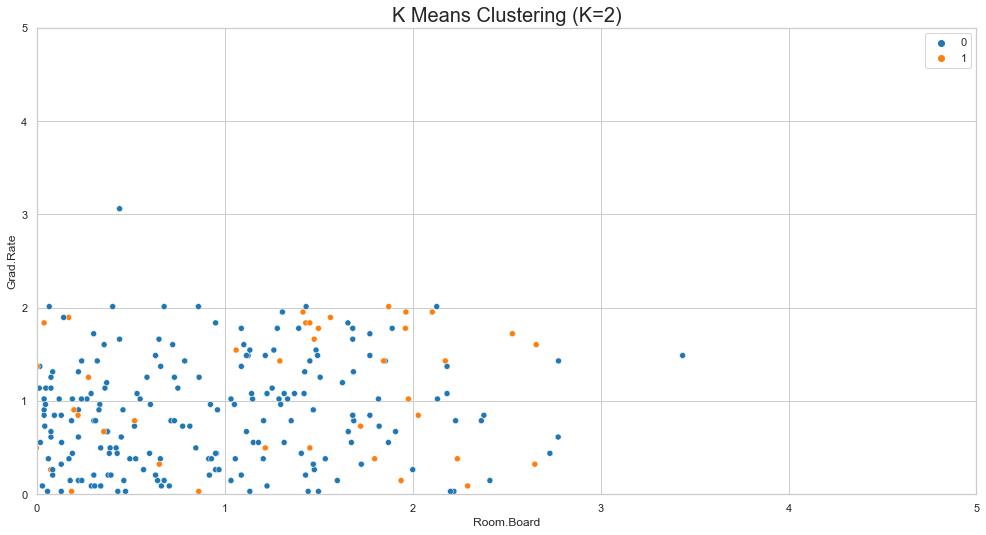

In [29]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_cluster, x='Room.Board',y='Grad.Rate', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=2)', fontsize = 20)
# visualisasi centroid
plt.scatter(
    km.cluster_centers_[:, 1],
    km.cluster_centers_[:, 2],
    color = 'yellow', marker = '*', s = 300
)
plt.ylim((0,5))
plt.xlim((0,5))
plt.legend()
plt.show()

In [30]:
hasil2=df_cluster.groupby(['cluster']).agg({'Private':'mean', 'Apps':'mean', 'Accept':'mean','Enroll':'mean',
                                           'Top10perc':'mean', 'Top25perc':'mean', 'F.Undergrad':'mean',
                                           'P.Undergrad':'mean', 'Outstate':'mean', 'Room.Board':'mean',
                                           'Books':'mean', 'Personal':'mean', 'PhD':'mean','Terminal':'mean',
                                           'S.F.Ratio':'mean', 'perc.alumni':'mean', 'Expend':'mean',
                                            'Grad.Rate':'mean'}).reset_index()
hasil2

cluster   Private      Apps    Accept    Enroll  Top10perc  Top25perc  \
0        0  0.793722 -0.307263 -0.298684 -0.311151  -0.127582  -0.117512   
1        1  0.314815  1.903323  1.850184  1.927408   0.790299   0.727922   

   F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  Personal  \
0    -0.311794    -0.170784 -0.011183   -0.042119 -0.044842 -0.089126   
1     1.931391     1.057912  0.069273    0.260902  0.277771  0.552087   

        PhD  Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0 -0.135913 -0.127615   0.002527     0.034804 -0.139530  -0.020024  
1  0.841906  0.790507  -0.015655    -0.215589  0.864311   0.124035

In [31]:
#Merge Country and Cluster
cluster_k = pd.concat([df['Univ'],df_cluster['cluster']], axis=1, join='outer')
cluster_k.sample(5)

Univ  cluster
55               Blackburn College        0
25        Arkansas Tech University        0
492        Saint John's University        0
111  Christian Brothers University        0
480                Rollins College        0

In [32]:
#Merge to Original Data
clustered_data_k = cluster_k.merge(df, on = 'Univ')
clustered_data_k.sample(5)

Univ  cluster  Private   Apps  Accept  \
496                  Saint Joseph College        0        1    292     241   
524                       Simmons College        0        1   1003     782   
25               Arkansas Tech University        0        0   1734    1729   
234                Green Mountain College        0        1    780     628   
605  University of California at Berkeley        1        0  19873    8252   

     Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  Outstate  \
496      96         20         52          543          712     12200   
524     295         23         53         1144          160     16160   
25      951         12         52         3602          939      3460   
234     198          7         20          545           42     11750   
605    3215         95        100        19532         2061     11648   

     Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  perc.alumni  \
496        4600    650       950   87        90       11.2           32   
524        6950    500      1200   74        81        8.9           33   
25         2650    450      1000   57        60       19.6            5   
234        2700    400       850   77        83       14.0           24   
605        6246    636      1933   93        97       15.8           10   

     Expend  Grad.Rate  
496    8680         76  
524   14086         79  
25     4739         48  
234    6475         76  
605   13919         78

In [33]:
clustered_data_k[clustered_data_k.cluster == 0].Univ.values

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Agnes Scott College',
       'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College', 'Alfred University',
       'Allegheny College', 'Allentown Coll. of St. Francis de Sales',
       'Alma College', 'Alverno College',
       'American International College', 'Amherst College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Aquinas College',
       'Arkansas College (Lyon College)', 'Arkansas Tech University',
       'Assumption College', 'Augsburg College', 'Augustana College IL',
       'Augustana College', 'Austin College', 'Averett College',
       'Baker University', 'Baldwin-Wallace College', 'Barat College',
       'Bard College', 'Barnard College', 'Barry University',
       'Beaver College', 'Bellarmine College', 'Belmont Abbey College',
       'Belmon

In [34]:
clustered_data_k[clustered_data_k.cluster == 0].Univ.count()

669

In [35]:
clustered_data_k[clustered_data_k.cluster == 1].Univ.values

array(['Antioch University', 'Appalachian State University',
       'Arizona State University Main campus',
       'Auburn University-Main Campus', 'Baylor University',
       'Boston University', 'Bowling Green State University',
       'Brigham Young University at Provo', 'Brown University',
       'California Polytechnic-San Luis',
       'California State University at Fresno',
       'Carnegie Mellon University', 'Clemson University',
       'Colorado State University', 'Columbia University',
       'Dartmouth College', 'Duke University', 'East Carolina University',
       'Emory University', 'Florida State University',
       'George Washington University', 'Georgetown University',
       'Georgia Institute of Technology', 'Harvard University',
       'Hofstra University', 'Illinois State University',
       'Indiana University at Bloomington', 'Iowa State University',
       'James Madison University', 'Johns Hopkins University',
       'Kansas State University',
       'Louisia

In [36]:
clustered_data_k[clustered_data_k.cluster == 1].Univ.count()

108

### Hierarchical Clustering

**Using Dendrograms to find the no. of Optimal Clusters**

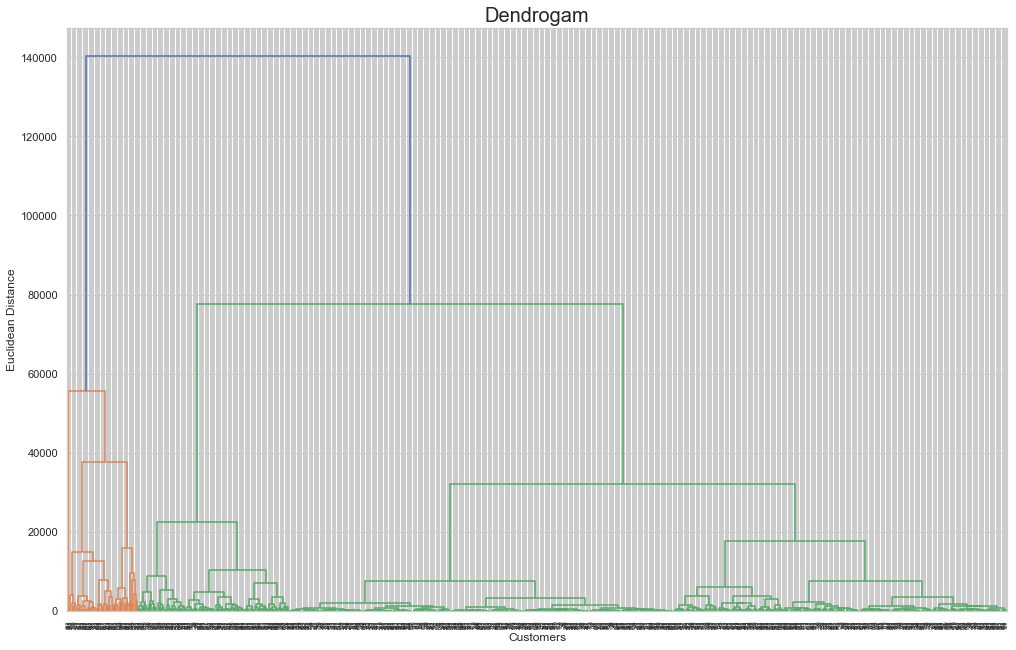

In [37]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(df.iloc[:, [1, 2, 3, 4]], method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

**Visualizing the Clusters of Hierarchial Clustering**

In [38]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster_hc = hc.fit_predict(df_cluster.drop(labels=['cluster'],axis=1))

In [39]:
cluster_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
df_cluster['cluster_hc']=cluster_hc

In [41]:
df_cluster

Private      Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0          1 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1          1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2          1 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3          1 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4          1 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   
..       ...       ...       ...       ...        ...        ...          ...   
772        0 -0.208040 -0.205673 -0.255200  -1.336352  -1.505488    -0.126030   
773        1 -0.269575 -0.087284 -0.091509  -0.201858  -0.444454    -0.175543   
774        1 -0.233895 -0.042377 -0.091509   0.365389   0.262901    -0.187095   
775        1  1.991711  0.177256  0.578333   3.825595   2.182866     0.312977   
776        1 -0.003268 -0.066872 -0.095816   0.025041   0.363952    -0.146867   

     P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
0      -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028   
1       0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646   
2      -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845   
3      -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206   
4       0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672   
..           ...       ...         ...       ...       ...       ...   
772     0.771435 -0.906289   -0.417455 -0.299280 -0.207855 -0.775861   
773     0.165435  0.268462    0.549707  0.306784 -0.133960  0.020822   
774    -0.453053 -0.880670   -0.143730  0.409815 -0.827095 -0.346878   
775    -0.507606  2.337894    1.963953  0.488603  1.144424  1.430339   
776     0.572283 -1.355744   -0.727676 -0.299280 -0.133960  0.143389   

     Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  cluster  \
0   -0.115729   1.013776    -0.867574 -0.501910  -0.318252        0   
1   -3.378176  -0.477704    -0.544572  0.166110  -0.551262        0   
2   -0.931341  -0.300749     0.585935 -0.177290  -0.667767        0   
3    1.175657  -1.615274     1.151188  1.792851  -0.376504        0   
4   -0.523535  -0.553542    -1.675079  0.241803  -2.939613        0   
..        ...        ...          ...       ...        ...      ...   
772 -1.339146   1.746877    -0.706073 -0.994781  -1.483301        0   
773 -0.319632  -0.199632     0.666685 -0.090290   1.021555        0   
774 -0.319632   0.078441    -0.221570 -0.256241  -0.959029        0   
775  1.107689  -2.095582     2.120194  5.887971   1.953595        1   
776 -0.319632   1.013776     0.424434 -0.987116   1.953595        0   

     cluster_hc  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
772           0  
773           0  
774           0  
775           0  
776           0  

[777 rows x 20 columns]

In [42]:
hasilhc=df_cluster.groupby(['cluster_hc']).agg({'Private':'mean', 'Apps':'mean', 'Accept':'mean','Enroll':'mean',
                                           'Top10perc':'mean', 'Top25perc':'mean', 'F.Undergrad':'mean',
                                           'P.Undergrad':'mean', 'Outstate':'mean', 'Room.Board':'mean',
                                           'Books':'mean', 'Personal':'mean', 'PhD':'mean','Terminal':'mean',
                                           'S.F.Ratio':'mean', 'perc.alumni':'mean', 'Expend':'mean',
                                            'Grad.Rate':'mean'}).reset_index()
hasilhc

cluster_hc   Private      Apps    Accept    Enroll  Top10perc  Top25perc  \
0           0  0.798851 -0.234480 -0.253621 -0.266193  -0.040731  -0.056149   
1           1  0.111111  2.014792  2.179258  2.287291   0.349982   0.482468   

   F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  Personal  \
0    -0.278569    -0.186531  0.049937    0.007978 -0.040571  -0.09136   
1     2.393627     1.602789 -0.429090   -0.068551  0.348610   0.78502   

        PhD  Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0 -0.088273 -0.085846  -0.061722     0.063841 -0.003885   0.029171  
1  0.758492  0.737643   0.530348    -0.548560  0.033384  -0.250650

In [43]:
print(hasil2)
print('-'*90)
print(hasilhc)

   cluster   Private      Apps    Accept    Enroll  Top10perc  Top25perc  \
0        0  0.793722 -0.307263 -0.298684 -0.311151  -0.127582  -0.117512   
1        1  0.314815  1.903323  1.850184  1.927408   0.790299   0.727922   

   F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  Personal  \
0    -0.311794    -0.170784 -0.011183   -0.042119 -0.044842 -0.089126   
1     1.931391     1.057912  0.069273    0.260902  0.277771  0.552087   

        PhD  Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0 -0.135913 -0.127615   0.002527     0.034804 -0.139530  -0.020024  
1  0.841906  0.790507  -0.015655    -0.215589  0.864311   0.124035  
------------------------------------------------------------------------------------------
   cluster_hc   Private      Apps    Accept    Enroll  Top10perc  Top25perc  \
0           0  0.798851 -0.234480 -0.253621 -0.266193  -0.040731  -0.056149   
1           1  0.111111  2.014792  2.179258  2.287291   0.349982   0.482468   

   F.Undergrad 

In [44]:
#Merge Country and Cluster
cluster_hc1 = pd.concat([df['Univ'],df_cluster['cluster_hc']], axis=1, join='outer')
cluster_hc1.sample(5)

Univ  cluster_hc
238             Grove City College           0
761         William Jewell College           0
233  Grand Valley State University           0
68             Bridgewater College           0
712      Virginia State University           0

In [117]:
#Merge to Original Data
clustered_data_hc = cluster_hc1.merge(df, on = 'Univ')
clustered_data_hc.sample(5)

Univ  cluster_hc  Private    Accept  \
376   Mississippi University for Women           0        0 -0.658820   
131         College of Saint Catherine           0        1 -0.656371   
262                 Huntingdon College           0        1 -0.611873   
274  Indiana University at Bloomington           1        0  4.582172   
754            Wheeling Jesuit College           0        1 -0.515936   

     Top10perc  Top25perc  P.Undergrad  Outstate  Room.Board     Books  \
376  -0.485482  -0.494980     0.104309 -1.505977   -1.953052  0.306784   
131  -0.258583  -0.242353    -0.192775  0.443568    0.075250 -0.602312   
262  -0.088409  -0.444454    -0.479344 -0.587169   -0.399206 -0.299280   
274  -0.145133   0.818680     1.223635 -0.167810   -0.335337  0.306784   
754  -0.712380  -0.343404    -0.361693  0.014757    0.171054  0.306784   

     Personal       PhD  Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
376  0.235515 -1.449978 -1.746952   0.432351    -1.190576 -0.758119  -0.143495  
131 -0.503435 -0.592011  0.495980  -0.654660     0.747436 -0.449404   0.672040  
262 -0.355645 -0.592011 -0.523535  -0.679939    -1.109826 -0.375051  -1.250292  
274  0.974465  0.265956  0.563948   1.822714     0.101432 -0.186680   0.147768  
754 -1.094595 -0.408161 -0.591502   0.002603     0.343683 -0.415102   0.380778

In [118]:
clustered_data_hc[clustered_data_hc.cluster_hc == 0].Univ.values

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Agnes Scott College',
       'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College', 'Alfred University',
       'Allegheny College', 'Allentown Coll. of St. Francis de Sales',
       'Alma College', 'Alverno College',
       'American International College', 'Amherst College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Antioch University',
       'Appalachian State University', 'Aquinas College',
       'Arkansas College (Lyon College)', 'Arkansas Tech University',
       'Assumption College', 'Augsburg College', 'Augustana College IL',
       'Augustana College', 'Austin College', 'Averett College',
       'Baker University', 'Baldwin-Wallace College', 'Barat College',
       'Bard College', 'Barnard College', 'Barry University',
       'Baylor University

In [47]:
clustered_data_hc[clustered_data_hc.cluster_hc == 0].Univ.count()

696

In [48]:
clustered_data_hc[clustered_data_hc.cluster_hc == 1].Univ.values

array(['Arizona State University Main campus',
       'Auburn University-Main Campus', 'Boston University',
       'Bowling Green State University',
       'Brigham Young University at Provo',
       'California Polytechnic-San Luis',
       'California State University at Fresno', 'Clemson University',
       'Colorado State University', 'East Carolina University',
       'Florida International University', 'Florida State University',
       'George Washington University', 'Georgia Institute of Technology',
       'Georgia State University', 'Illinois State University',
       'Indiana University at Bloomington', 'Iowa State University',
       'Kansas State University',
       'Louisiana State University at Baton Rouge',
       'Miami University at Oxford', 'Michigan State University',
       'New York University',
       'North Carolina State University at Raleigh',
       'Northeastern University', 'Northern Illinois University',
       'Ohio University', 'Oklahoma State University

In [49]:
clustered_data_hc[clustered_data_hc.cluster_hc == 1].Univ.count()

81

## Menggunakan PCA

In [50]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [51]:
df.head()

Univ  Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University        1  1660    1232     721         23   
1            Adelphi University        1  2186    1924     512         16   
2                Adrian College        1  1428    1097     336         22   
3           Agnes Scott College        1   417     349     137         60   
4     Alaska Pacific University        1   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [52]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()
# Create a list of the variables that you need to scale

varlist = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
          'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
# Scale these variables using 'fit_transform'
df[varlist] = scaler.fit_transform(df[varlist])

## PCA on Data

In [53]:
# Putting feature variable to X
X = df.drop(['Univ'],axis=1)

# Putting COUNTRY
univ = df['Univ']

In [54]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [55]:
#Doing the PCA on the train data
pca.fit(X)

PCA(random_state=42)

#### PCA Component or Weight

In [56]:
pca.components_

array([[ 1.70468976e-02,  2.44752514e-01,  2.03143010e-01,
         1.71407717e-01,  3.55148921e-01,  3.44404948e-01,
         1.49546938e-01,  2.26625064e-02,  2.97876428e-01,
         2.50789754e-01,  6.41642242e-02, -4.51157205e-02,
         3.17323613e-01,  3.16227414e-01, -1.80015570e-01,
         2.08019496e-01,  3.20443748e-01,  2.54362369e-01],
       [-1.54759912e-01,  3.30487906e-01,  3.69515277e-01,
         4.00956880e-01, -7.57020473e-02, -3.84769691e-02,
         4.14790529e-01,  3.11121379e-01, -2.44251362e-01,
        -1.34099188e-01,  5.54110631e-02,  2.15841230e-01,
         6.46466456e-02,  5.27052236e-02,  2.42269586e-01,
        -2.40493044e-01, -1.25541686e-01, -1.64048280e-01],
       [ 4.38611929e-02, -5.39863199e-02, -9.12129482e-02,
        -7.57701932e-02,  3.10361602e-02, -2.89969400e-02,
        -5.56331425e-02,  1.41075215e-01,  4.95943754e-02,
         1.54087586e-01,  6.77197163e-01,  4.96619990e-01,
        -1.38805469e-01, -7.75270448e-02, -2.91205416e

In [57]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

PC1       PC2      Feature
0   0.017047 -0.154760      Private
1   0.244753  0.330488         Apps
2   0.203143  0.369515       Accept
3   0.171408  0.400957       Enroll
4   0.355149 -0.075702    Top10perc
5   0.344405 -0.038477    Top25perc
6   0.149547  0.414791  F.Undergrad
7   0.022663  0.311121  P.Undergrad
8   0.297876 -0.244251     Outstate
9   0.250790 -0.134099   Room.Board
10  0.064164  0.055411        Books
11 -0.045116  0.215841     Personal
12  0.317324  0.064647          PhD
13  0.316227  0.052705     Terminal
14 -0.180016  0.242270    S.F.Ratio
15  0.208019 -0.240493  perc.alumni
16  0.320444 -0.125542       Expend
17  0.254362 -0.164048    Grad.Rate

### Choose Number of PC

In [58]:
#Eigenvalue
pca.explained_variance_

array([5.45190555, 4.59152635, 1.17673169, 1.01648547, 0.93480328,
       0.84864198, 0.60719569, 0.58797353, 0.53086176, 0.40459014,
       0.31388518, 0.22803426, 0.16779529, 0.14400522, 0.08804187,
       0.06952592, 0.03555976, 0.02300023])

In [59]:
#Proportion
pca.explained_variance_ratio_

array([0.31659276, 0.26663044, 0.06833294, 0.05902742, 0.05428413,
       0.04928073, 0.03525992, 0.03414369, 0.0308272 , 0.02349459,
       0.01822735, 0.01324197, 0.00974389, 0.0083624 , 0.0051126 ,
       0.00403738, 0.00206496, 0.00133563])

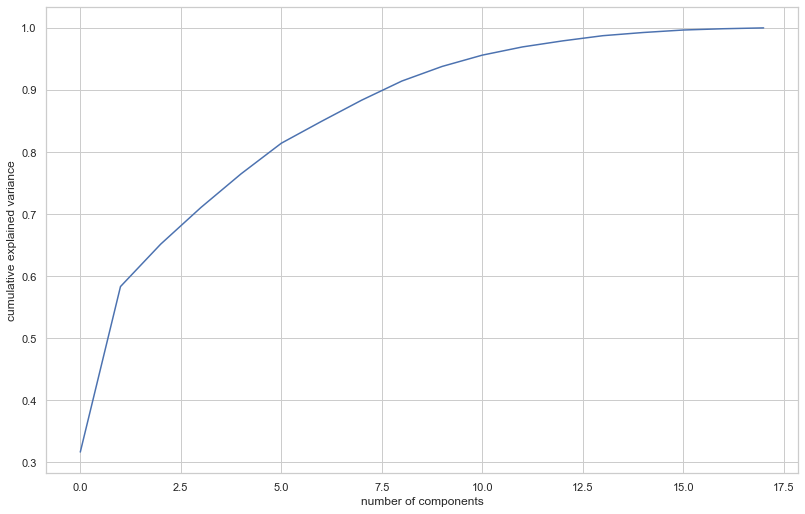

In [60]:
# plotting the cumulative variance against the number of components
plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

#### 10 components are enough to describe 95% of the variance in the dataset
We'll choose 10 components for our model

In [61]:
pca_final= PCA(n_components=10,random_state=42)

#### Basis transformation - getting the data onto our PCs

In [62]:
df_pca = pca_final.fit_transform(X)

In [63]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

0         1         2         3         4         5         6  \
0 -1.597508  0.696392 -0.103848 -0.887443 -0.703297 -0.314767  0.655178   
1 -2.178395 -0.666978  2.374312  3.560526  0.950467 -0.145814  0.204147   
2 -1.412546 -1.144900 -0.418256  0.690639 -0.381654 -0.959004 -0.240601   
3  2.890942 -2.592994  0.094833 -1.327503 -0.152865 -1.063734 -1.248743   
4 -2.207216 -0.052375  2.370356 -1.140547  0.708368  0.002930 -2.151939   

          7         8         9  
0 -0.883174  0.104905  0.063378  
1  0.034702  1.097220  0.946323  
2  0.314196 -0.102125  0.644478  
3 -0.121201  0.388827  0.461449  
4 -0.575292 -0.132247  0.382726

#### Creating correlation matrix for the principal components - we expect little to no correlation

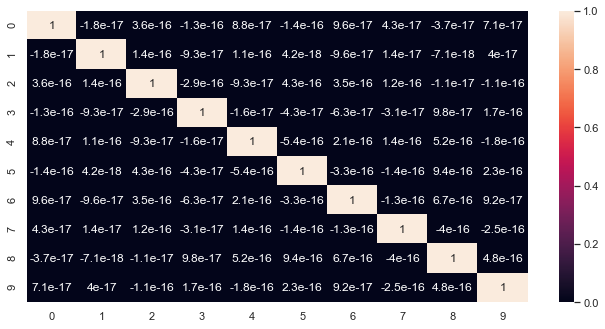

In [64]:
#plotting the correlation matrix
plt.figure(figsize = (10,5))
sns.heatmap(df_pca.corr(),annot = True)

## Hierarchical clustering

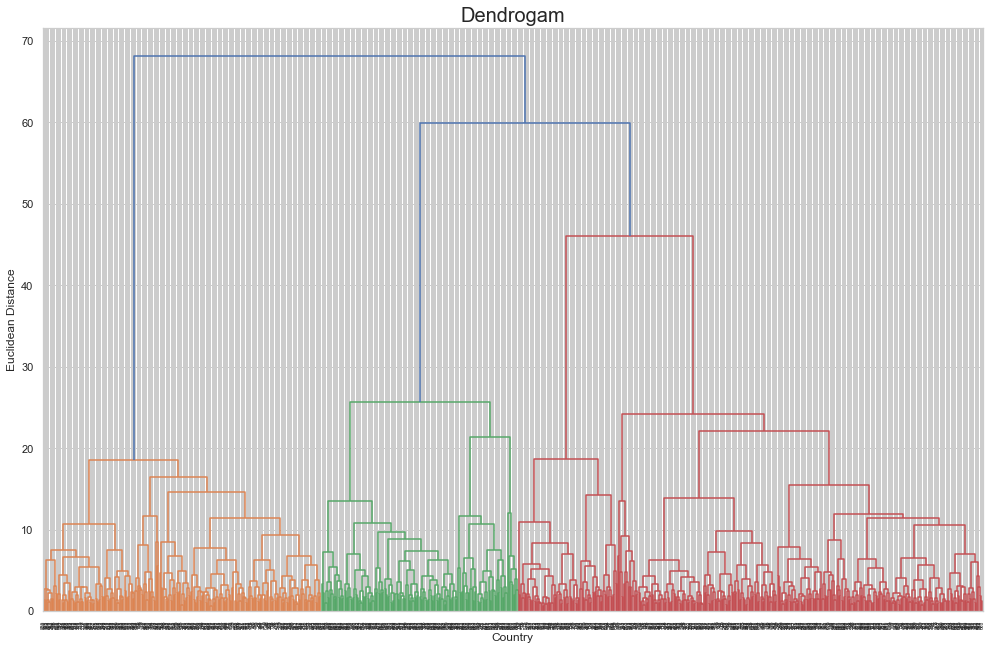

In [130]:
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward',metric='euclidean'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Euclidean Distance')
plt.show()

Looking at the dedrogram it is observed that cutting it at n = 3 is the most optimum.

In [131]:
#Modeling Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster_hc_pca = hc.fit_predict(df_pca)

In [132]:
#Add cluster result to Dataframe
df_pca['cluster']=cluster_hc_pca

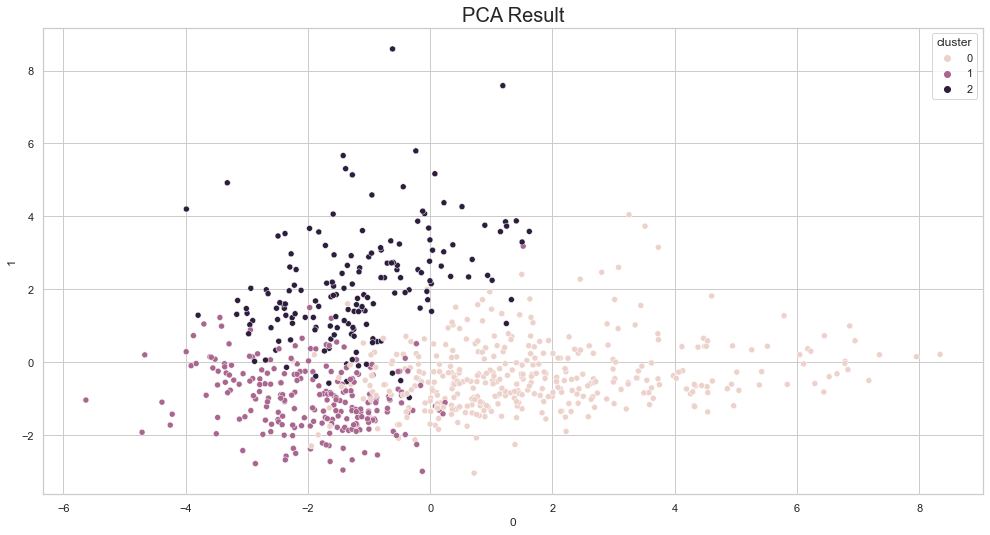

In [133]:
plt.figure(figsize=(15,8))
sns.scatterplot(df_pca.iloc[:,0],df_pca.iloc[:,1],hue=df_pca['cluster'])
plt.title('PCA Result', fontsize = 20)
plt.show()

In [134]:
#Merge Country and Cluster
pca_cluster_hc = pd.concat([df['Univ'],df_pca['cluster']], axis=1, join='outer')
pca_cluster_hc.sample(5)

Univ  cluster
325       Louisiana Tech University        2
271              Immaculata College        0
99   Centenary College of Louisiana        0
433        Ohio Wesleyan University        0
454     Point Loma Nazarene College        0

In [135]:
#Merge to Original Data
clustered_data_hc_pca = pca_cluster_hc.merge(df, on = 'Univ')
clustered_data_hc_pca.sample(5)

Univ  cluster  Private    Accept  Top10perc  \
705                Ursuline College        1        1 -0.718015  -0.372032   
273        Indiana State University        2        0  1.119475  -0.996004   
192        Emporia State University        1        0 -0.311408   0.875911   
723                Wartburg College        0        1 -0.385707   0.365389   
94   Catholic University of America        0        1 -0.226085  -0.201858   

     Top25perc  P.Undergrad  Outstate  Room.Board     Books  Personal  \
705  -0.444454    -0.090899 -0.209099   -0.141905 -0.602312 -0.872910   
273  -1.252861     0.718854 -0.882660   -0.594464  0.306784  1.713415   
192   1.172358    -0.175687 -1.253516   -1.107242 -0.602312  0.808940   
723   0.515528    -0.493146  0.288360   -0.682056 -0.905344 -0.725120   
94   -0.343404    -0.423476  0.813677    1.870886 -0.141704 -0.355645   

          PhD  Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
705 -2.062812 -0.727438  -0.907453    -0.625323 -0.478340   0.147768  
273 -0.040461 -0.251664   0.634586    -1.190576 -0.510533  -1.483301  
192 -0.040461 -0.319632   1.317128    -1.513578 -0.792037  -0.900777  
723 -0.408161  0.767851  -0.427146     1.151188 -0.368919   0.089515  
94   1.062639  1.107689  -1.210805    -0.383071  0.592294   0.555535

In [136]:
#See Characteristic of Cluster in each variables
hasil_pca1=clustered_data_hc_pca.groupby(['cluster']).agg("mean").reset_index()
hasil_pca1

cluster   Private    Accept  Top10perc  Top25perc  P.Undergrad  Outstate  \
0        0  0.940104 -0.128241   0.496565   0.466713    -0.292358  0.705945   
1        1  0.808696 -0.499252  -0.610522  -0.718610    -0.282832 -0.587477   
2        2  0.110429  1.006578  -0.308347  -0.085507     1.087835 -0.834130   

   Room.Board     Books  Personal       PhD  Terminal  S.F.Ratio  perc.alumni  \
0    0.599073  0.093572 -0.333173  0.392193  0.458456  -0.389161     0.518222   
1   -0.670190 -0.225209  0.133495 -0.971435 -1.073482   0.088113    -0.382369   
2   -0.465645  0.097339  0.596531  0.446798  0.434684   0.792465    -0.681303   

     Expend  Grad.Rate  
0  0.459722   0.573132  
1 -0.500073  -0.502634  
2 -0.377403  -0.640964

In [137]:
clustered_data_hc_pca[clustered_data_hc_pca.cluster == 0].Univ.values

array(['Adelphi University', 'Agnes Scott College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alfred University', 'Allegheny College',
       'Allentown Coll. of St. Francis de Sales', 'Alma College',
       'American International College', 'Amherst College',
       'Antioch University', 'Arkansas College (Lyon College)',
       'Assumption College', 'Augsburg College', 'Augustana College IL',
       'Austin College', 'Baldwin-Wallace College', 'Barat College',
       'Bard College', 'Barnard College', 'Barry University',
       'Baylor University', 'Beaver College', 'Bellarmine College',
       'Beloit College', 'Bennington College', 'Bentley College',
       'Birmingham-Southern College', 'Boston University',
       'Bowdoin College', 'Bradford College', 'Bradley University',
       'Brandeis University', 'Brenau University', 'Bridgewater College',
       'Brown University', 'Bryn Mawr College', 'Bucknell University',
       'Butler University',

In [138]:
clustered_data_hc_pca[clustered_data_hc_pca.cluster == 0].Univ.count()

384

In [139]:
clustered_data_hc_pca[clustered_data_hc_pca.cluster == 1].Univ.values

array(['Abilene Christian University', 'Adrian College',
       'Alaska Pacific University', 'Albertson College',
       'Alderson-Broaddus College', 'Alverno College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Aquinas College',
       'Arkansas Tech University', 'Augustana College',
       'Baker University', 'Belmont Abbey College', 'Belmont University',
       'Bemidji State University', 'Benedictine College', 'Berry College',
       'Bethany College', 'Bethel College KS', 'Bethel College',
       'Bethune Cookman College', 'Blackburn College',
       'Bluefield College', 'Bluffton College', 'Brewton-Parker College',
       'Briar Cliff College', 'Buena Vista College',
       'Campbellsville College', 'Capitol College',
       'Carson-Newman College', 'Catawba College', 'Cazenovia College',
       'Cedarville College', 'Central Wesleyan College',
       'Christian Brothers University', 'Claflin College',
       'Clinch Valley Coll. of  th

In [141]:
clustered_data_hc_pca[clustered_data_hc_pca.cluster == 1].Univ.count()

230

In [142]:
clustered_data_hc_pca[clustered_data_hc_pca.cluster == 2].Univ.values

array(['Appalachian State University',
       'Arizona State University Main campus',
       'Auburn University-Main Campus', 'Averett College',
       'Bloomsburg Univ. of Pennsylvania',
       'Bowling Green State University',
       'Brigham Young University at Provo',
       'California Polytechnic-San Luis',
       'California State University at Fresno', 'Campbell University',
       'Central Connecticut State University',
       'Central Missouri State University',
       'Central Washington University', 'Christopher Newport University',
       'College of Charleston', 'Colorado State University',
       'Columbia College MO', 'East Carolina University',
       'East Tennessee State University',
       'Eastern Connecticut State University',
       'Eastern Illinois University', 'Evergreen State College',
       'Florida International University', 'Florida State University',
       'Fort Lewis College', 'Francis Marion University',
       'George Mason University', 'Georgetown C

In [143]:
clustered_data_hc_pca[clustered_data_hc_pca.cluster == 2].Univ.count()

163

### Mencoba dengan Drop kolom yang berkorelasi tinggi

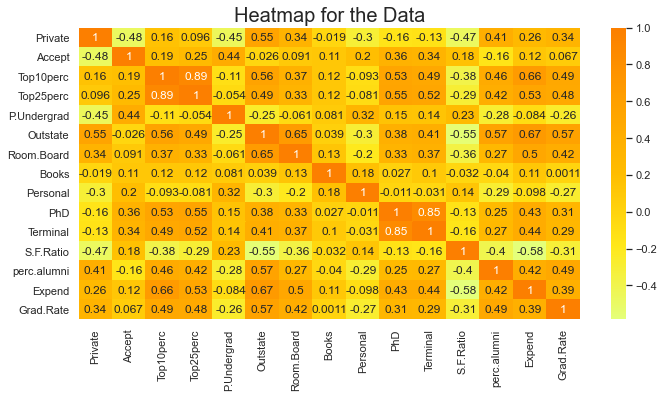

In [144]:
# Melihat hasil hubungan korelasi antar kolom dataset
plt.figure(figsize=(10,5))
sns.heatmap(df.drop(labels=['Univ'],axis=1).corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [145]:
# Droping the Highly correlated features 
df_drop = df.drop(['Apps','Enroll','F.Undergrad'],inplace=True,axis=1)

KeyError: "['Apps' 'Enroll' 'F.Undergrad'] not found in axis"

In [168]:
df.head()

Univ  Private    Accept  Top10perc  Top25perc  \
0  Abilene Christian University        1 -0.321205  -0.258583  -0.191827   
1            Adelphi University        1 -0.038703  -0.655656  -1.353911   
2                Adrian College        1 -0.376318  -0.315307  -0.292878   
3           Agnes Scott College        1 -0.681682   1.840231   1.677612   
4     Alaska Pacific University        1 -0.764555  -0.655656  -0.596031   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [169]:
# Putting feature variable to X
X2 = df.drop(['Univ'],axis=1)

# Putting COUNTRY
univ = df['Univ']

In [170]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [171]:
#Doing the PCA on the train data
pca.fit(X2)

PCA(random_state=42)

In [172]:
pca.components_

array([[ 6.78430695e-02,  6.45227664e-02,  3.63080146e-01,
         3.41115588e-01, -8.04586035e-02,  3.64333260e-01,
         2.82428959e-01,  4.35110854e-02, -1.12780704e-01,
         2.83284107e-01,  2.86331898e-01, -2.51564602e-01,
         2.78256579e-01,  3.45847007e-01,  2.94785511e-01],
       [-1.91816187e-01,  4.85727018e-01,  9.61257049e-02,
         1.48173352e-01,  4.57066076e-01, -1.61492274e-01,
        -3.15165702e-02,  1.52787333e-01,  3.20672987e-01,
         3.33419499e-01,  3.19555479e-01,  2.31450809e-01,
        -2.27259861e-01,  6.71590524e-03, -1.24003425e-01],
       [ 7.55905487e-02, -7.60955309e-02,  1.82253597e-02,
        -5.72993932e-02,  6.47031773e-02,  8.16584093e-02,
         1.70505342e-01,  6.62860415e-01,  4.25645653e-01,
        -2.70159629e-01, -2.06968714e-01, -3.43895016e-01,
        -1.13584556e-01,  2.38270825e-01, -1.43648322e-01],
       [ 4.00001923e-02,  1.17414548e-01, -3.96402279e-01,
        -4.32703741e-01,  2.86180637e-01,  2.42169308

In [173]:
colnames = list(X2.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

PC1       PC2      Feature
0   0.067843 -0.191816      Private
1   0.064523  0.485727       Accept
2   0.363080  0.096126    Top10perc
3   0.341116  0.148173    Top25perc
4  -0.080459  0.457066  P.Undergrad
5   0.364333 -0.161492     Outstate
6   0.282429 -0.031517   Room.Board
7   0.043511  0.152787        Books
8  -0.112781  0.320673     Personal
9   0.283284  0.333419          PhD
10  0.286332  0.319555     Terminal
11 -0.251565  0.231451    S.F.Ratio
12  0.278257 -0.227260  perc.alumni
13  0.345847  0.006716       Expend
14  0.294786 -0.124003    Grad.Rate

In [174]:
#Eigenvalue
pca.explained_variance_

array([5.26190691, 2.39622455, 1.16301914, 0.93448609, 0.85442618,
       0.73304212, 0.60085268, 0.57878248, 0.46743289, 0.3921233 ,
       0.30834347, 0.22671182, 0.14437632, 0.08524192, 0.06972729])

In [175]:
#Proportion
pca.explained_variance_ratio_

array([0.37012161, 0.16855002, 0.08180656, 0.06573159, 0.06010019,
       0.05156206, 0.04226387, 0.04071146, 0.03287915, 0.02758188,
       0.02168883, 0.01594687, 0.01015541, 0.0059959 , 0.00490461])

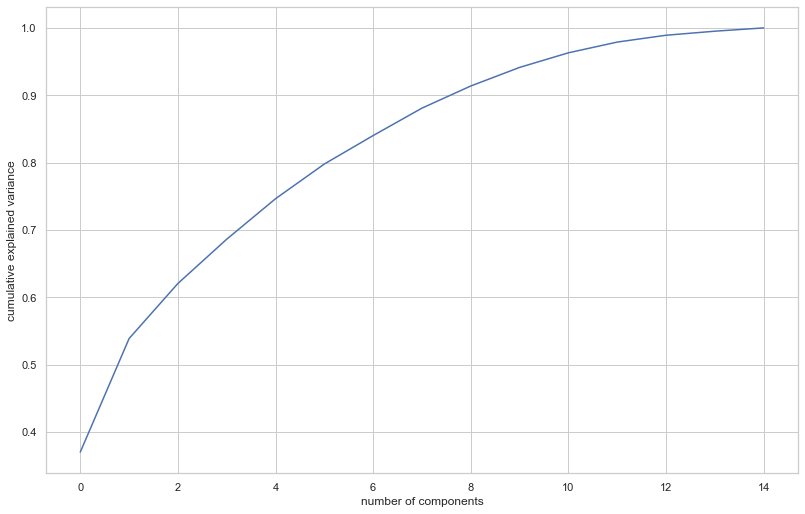

In [176]:
# plotting the cumulative variance against the number of components
plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [177]:
pca_final= PCA(n_components=10,random_state=42)

In [178]:
df_pca = pca_final.fit_transform(X2)

In [179]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

0         1         2         3         4         5         6  \
0 -1.701745  0.485488 -0.302286 -0.874007 -0.471196 -0.171785  0.677068   
1 -1.832960 -1.984828  3.141029  1.617047  0.660530  2.208771 -0.275193   
2 -0.900944 -1.593125 -0.151738 -0.255865 -0.756478  0.497283 -0.260339   
3  3.726181 -0.447199 -0.152346 -0.413888 -1.380782 -0.847026 -1.164894   
4 -1.957348  0.378859  2.026770  0.399241 -0.524551 -1.870057 -1.820900   

          7         8         9  
0 -0.827833 -0.312206 -0.027948  
1 -0.042020 -0.764965  0.868413  
2  0.319968  0.046192  0.690334  
3 -0.155419 -0.580741  0.259501  
4 -0.601816 -0.182736  0.263034

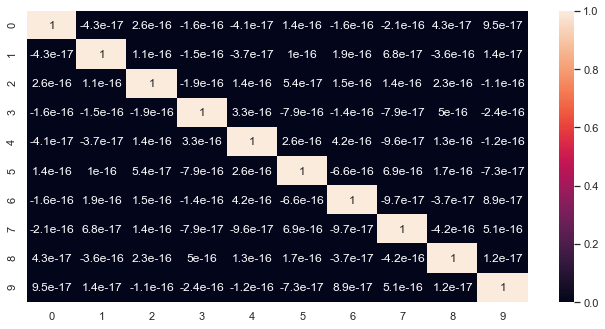

In [180]:
#plotting the correlation matrix
plt.figure(figsize = (10,5))
sns.heatmap(df_pca.corr(),annot = True)

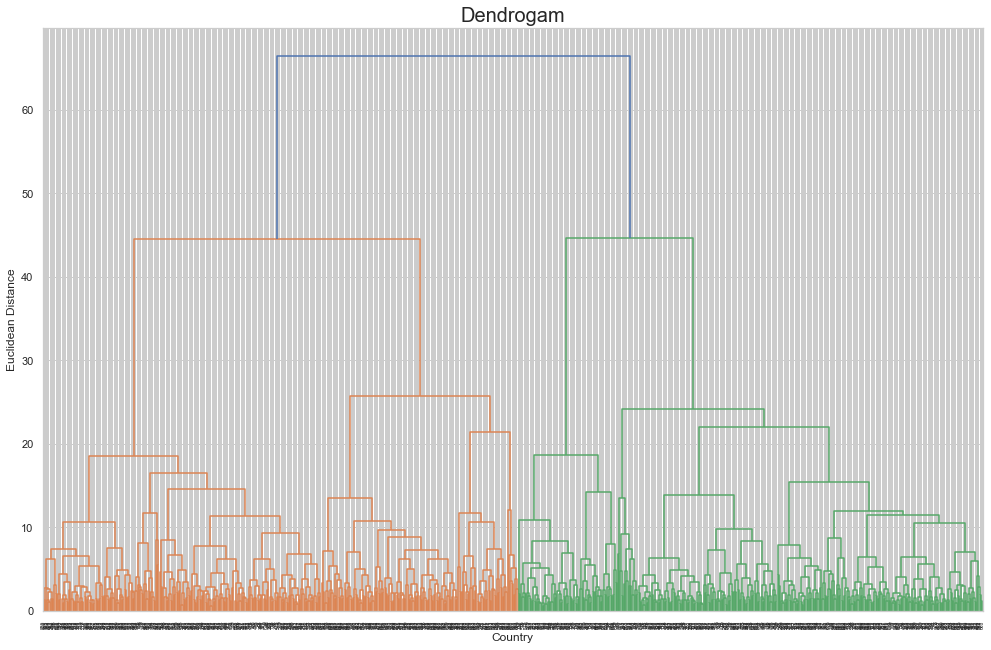

In [181]:
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward',metric='euclidean'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Euclidean Distance')
plt.show()

In [182]:
#Modeling Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster_hc_pca = hc.fit_predict(df_pca)

In [183]:
#Add cluster result to Dataframe
df_pca['cluster']=cluster_hc_pca

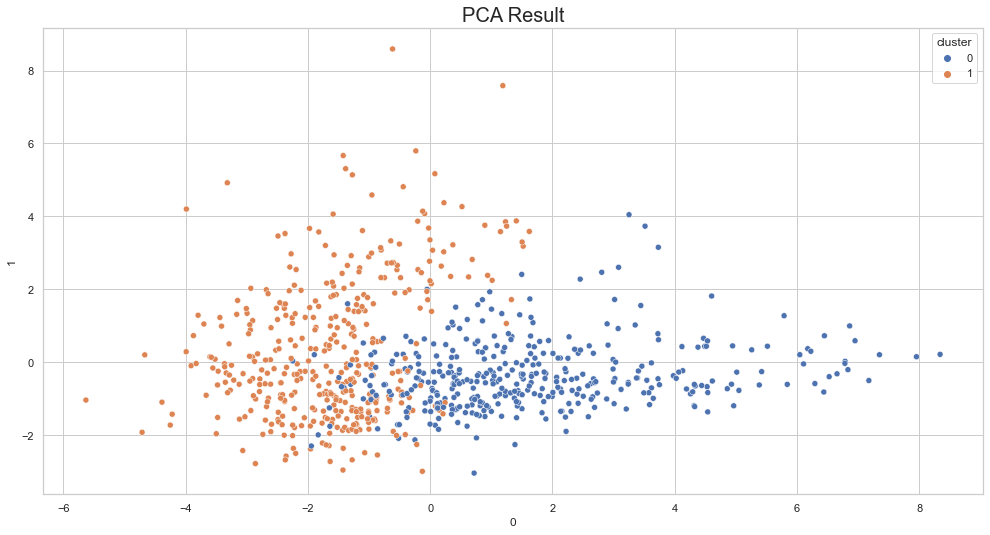

In [184]:
plt.figure(figsize=(15,8))
sns.scatterplot(df_pca.iloc[:,0],df_pca.iloc[:,1],hue=df_pca['cluster'])
plt.title('PCA Result', fontsize = 20)
plt.show()

In [185]:
#Merge Country and Cluster
pca_cluster_hc = pd.concat([df['Univ'],df_pca['cluster']], axis=1, join='outer')
pca_cluster_hc.sample(5)

Univ  cluster
162                    Denison University        0
392                    Mount Mary College        1
190                 Emory & Henry College        0
683  University of Tennessee at Knoxville        1
389                        Morris College        1

In [186]:
#Merge to Original Data
clustered_data_hc = pca_cluster_hc.merge(df, on = 'Univ')
clustered_data_hc.sample(5)

Univ  cluster  Private    Accept  \
388                     Morningside College        1        1 -0.606566   
280                       Jamestown College        1        1 -0.656779   
604  University of Arkansas at Fayetteville        1        0  0.444654   
719                          Wagner College        0        1 -0.409794   
694                University of Washington        1        0  2.043732   

     Top10perc  Top25perc  P.Undergrad  Outstate  Room.Board     Books  \
388  -0.655656  -1.000234    -0.412303  0.019732   -0.620011 -0.299280   
280  -0.769105  -0.747607    -0.515494 -0.701585   -1.193009 -0.905344   
604  -0.145133   0.465003     0.443459 -1.346292   -0.964905 -0.299280   
719  -0.996004  -0.596031    -0.485259  0.760947    1.316137  0.215874   
694   0.705737   1.273409     2.449438 -0.557570   -0.127306  0.961333   

     Personal       PhD  Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
388 -0.503435 -1.511262 -0.795405  -0.275470     0.747436 -0.296867  -0.551262  
280 -1.390175 -1.327412 -1.814920   0.735703    -0.140820 -1.240641  -0.667767  
604  0.974465  0.020822  0.631915   0.179558    -1.029075 -0.544260  -1.541554  
719  0.531095 -0.346878 -0.115729  -0.224911     0.020681 -0.125358   0.555535  
694  1.228664  1.430339  0.971754  -1.286643    -1.029075  1.315886  -0.026990

In [187]:
#See Characteristic of Cluster in each variables
hasil_pca2=clustered_data_hc.groupby(['cluster']).agg("mean").reset_index()
hasil_pca2

cluster   Private    Accept  Top10perc  Top25perc  P.Undergrad  Outstate  \
0        0  0.940104 -0.128241   0.496565   0.466713    -0.292358  0.705945   
1        1  0.519084  0.125304  -0.485193  -0.456025     0.285663 -0.689778   

   Room.Board     Books  Personal       PhD  Terminal  S.F.Ratio  perc.alumni  \
0    0.599073  0.093572 -0.333173  0.392193  0.458456  -0.389161     0.518222   
1   -0.585353 -0.091430  0.325543 -0.383211 -0.447957   0.380249    -0.506354   

     Expend  Grad.Rate  
0  0.459722   0.573132  
1 -0.449194  -0.560007

In [188]:
clustered_data_hc[clustered_data_hc.cluster == 0].Univ.values

array(['Adelphi University', 'Agnes Scott College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alfred University', 'Allegheny College',
       'Allentown Coll. of St. Francis de Sales', 'Alma College',
       'American International College', 'Amherst College',
       'Antioch University', 'Arkansas College (Lyon College)',
       'Assumption College', 'Augsburg College', 'Augustana College IL',
       'Austin College', 'Baldwin-Wallace College', 'Barat College',
       'Bard College', 'Barnard College', 'Barry University',
       'Baylor University', 'Beaver College', 'Bellarmine College',
       'Beloit College', 'Bennington College', 'Bentley College',
       'Birmingham-Southern College', 'Boston University',
       'Bowdoin College', 'Bradford College', 'Bradley University',
       'Brandeis University', 'Brenau University', 'Bridgewater College',
       'Brown University', 'Bryn Mawr College', 'Bucknell University',
       'Butler University',

In [189]:
clustered_data_hc[clustered_data_hc.cluster == 1].Univ.values

array(['Abilene Christian University', 'Adrian College',
       'Alaska Pacific University', 'Albertson College',
       'Alderson-Broaddus College', 'Alverno College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Appalachian State University',
       'Aquinas College', 'Arizona State University Main campus',
       'Arkansas Tech University', 'Auburn University-Main Campus',
       'Augustana College', 'Averett College', 'Baker University',
       'Belmont Abbey College', 'Belmont University',
       'Bemidji State University', 'Benedictine College', 'Berry College',
       'Bethany College', 'Bethel College KS', 'Bethel College',
       'Bethune Cookman College', 'Blackburn College',
       'Bloomsburg Univ. of Pennsylvania', 'Bluefield College',
       'Bluffton College', 'Bowling Green State University',
       'Brewton-Parker College', 'Briar Cliff College',
       'Brigham Young University at Provo', 'Buena Vista College',
       'Califor

In [190]:
clustered_data_hc[clustered_data_hc.cluster == 1].Univ.count()

393

In [191]:
clustered_data_hc[clustered_data_hc.cluster == 0].Univ.count()

384

## Kesimpulan
Ada 4 model yang dibuat yaitu :

1) K-Means Clustering

2) Hierarical Clustering

3) PCA dengan Hierical Clustering

4) PCA dengan Hierical Clustering drop 3 kolom yang sangat tinggi korelasi nya

## Perbedaan antara titik pusat clustering

In [193]:
print('Hasil Titik Pusat K-Means')
print(hasil2)
print('Hasil Titik Pusat Hierical Clustering')
print(hasilhc)
print('Hasil Titik Pusat Hierical Clustering dengan PCA')
print(hasil_pca1)
print('Hasil Titik Pusat Hierical Clustering dengan PCA drop 3 kolom')
print(hasil_pca2)

Hasil Titik Pusat K-Means
   cluster   Private      Apps    Accept    Enroll  Top10perc  Top25perc  \
0        0  0.793722 -0.307263 -0.298684 -0.311151  -0.127582  -0.117512   
1        1  0.314815  1.903323  1.850184  1.927408   0.790299   0.727922   

   F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  Personal  \
0    -0.311794    -0.170784 -0.011183   -0.042119 -0.044842 -0.089126   
1     1.931391     1.057912  0.069273    0.260902  0.277771  0.552087   

        PhD  Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0 -0.135913 -0.127615   0.002527     0.034804 -0.139530  -0.020024  
1  0.841906  0.790507  -0.015655    -0.215589  0.864311   0.124035  
Hasil Titik Pusat Hierical Clustering
   cluster_hc   Private      Apps    Accept    Enroll  Top10perc  Top25perc  \
0           0  0.798851 -0.234480 -0.253621 -0.266193  -0.040731  -0.056149   
1           1  0.111111  2.014792  2.179258  2.287291   0.349982   0.482468   

   F.Undergrad  P.Undergrad  Outstate  Roo

Dari hasil 4 model diatas bisa dilihat bahwa terjadi perbedaan dengan menggunakan K-Means, Hierical Clustering dan PCA Hierical Clustering drop 3 kolom mempunyai 2 titik pusat, sedangkan PCA Clustering mempunyai 3 titik pusat
Sehingga bisa saya simpulkan bahwa dengan 2 titik pusat bisa mempresentasikan hasil clusteringnya

## K-Means Clustering

In [107]:
clustered_data_k[clustered_data_k.cluster == 0].Univ.values

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Agnes Scott College',
       'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College', 'Alfred University',
       'Allegheny College', 'Allentown Coll. of St. Francis de Sales',
       'Alma College', 'Alverno College',
       'American International College', 'Amherst College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Aquinas College',
       'Arkansas College (Lyon College)', 'Arkansas Tech University',
       'Assumption College', 'Augsburg College', 'Augustana College IL',
       'Augustana College', 'Austin College', 'Averett College',
       'Baker University', 'Baldwin-Wallace College', 'Barat College',
       'Bard College', 'Barnard College', 'Barry University',
       'Beaver College', 'Bellarmine College', 'Belmont Abbey College',
       'Belmon

In [108]:
clustered_data_k[clustered_data_k.cluster == 0].Univ.count()

669

In [109]:
clustered_data_k[clustered_data_k.cluster == 1].Univ.values

array(['Antioch University', 'Appalachian State University',
       'Arizona State University Main campus',
       'Auburn University-Main Campus', 'Baylor University',
       'Boston University', 'Bowling Green State University',
       'Brigham Young University at Provo', 'Brown University',
       'California Polytechnic-San Luis',
       'California State University at Fresno',
       'Carnegie Mellon University', 'Clemson University',
       'Colorado State University', 'Columbia University',
       'Dartmouth College', 'Duke University', 'East Carolina University',
       'Emory University', 'Florida State University',
       'George Washington University', 'Georgetown University',
       'Georgia Institute of Technology', 'Harvard University',
       'Hofstra University', 'Illinois State University',
       'Indiana University at Bloomington', 'Iowa State University',
       'James Madison University', 'Johns Hopkins University',
       'Kansas State University',
       'Louisia

In [111]:
clustered_data_k[clustered_data_k.cluster == 1].Univ.count()

108

Untuk model K-Means ini terbagi menjadi 2 cluster yaitu : 
- cluster 0, yang menunjukkan kebanyakan di universitas private dan jumlah universitasnya adalah 669
- cluster 1, yang menunjukkan kebanyakan di universitas public dan jumlah universitasnya adalah 108

## Hierarical Clustering

In [119]:
clustered_data_hc[clustered_data_hc.cluster_hc == 0].Univ.values

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Agnes Scott College',
       'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College', 'Alfred University',
       'Allegheny College', 'Allentown Coll. of St. Francis de Sales',
       'Alma College', 'Alverno College',
       'American International College', 'Amherst College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Antioch University',
       'Appalachian State University', 'Aquinas College',
       'Arkansas College (Lyon College)', 'Arkansas Tech University',
       'Assumption College', 'Augsburg College', 'Augustana College IL',
       'Augustana College', 'Austin College', 'Averett College',
       'Baker University', 'Baldwin-Wallace College', 'Barat College',
       'Bard College', 'Barnard College', 'Barry University',
       'Baylor University

In [120]:
clustered_data_hc[clustered_data_hc.cluster_hc == 0].Univ.count()

696

In [121]:
clustered_data_hc[clustered_data_hc.cluster_hc == 1].Univ.values

array(['Arizona State University Main campus',
       'Auburn University-Main Campus', 'Boston University',
       'Bowling Green State University',
       'Brigham Young University at Provo',
       'California Polytechnic-San Luis',
       'California State University at Fresno', 'Clemson University',
       'Colorado State University', 'East Carolina University',
       'Florida International University', 'Florida State University',
       'George Washington University', 'Georgia Institute of Technology',
       'Georgia State University', 'Illinois State University',
       'Indiana University at Bloomington', 'Iowa State University',
       'Kansas State University',
       'Louisiana State University at Baton Rouge',
       'Miami University at Oxford', 'Michigan State University',
       'New York University',
       'North Carolina State University at Raleigh',
       'Northeastern University', 'Northern Illinois University',
       'Ohio University', 'Oklahoma State University

In [122]:
clustered_data_hc[clustered_data_hc.cluster_hc == 1].Univ.count()

81

Untuk model Hierarical  ini terbagi menjadi 2 cluster yaitu : 
- cluster 0, yang menunjukkan kebanyakan di universitas private dan jumlah universitasnya adalah 696
- cluster 1, yang menunjukkan kebanyakan di universitas public dan jumlah universitasnya adalah 81

Ada cukup perbedaan antara K-Means dan Hierarical Clustering ini

## PCA Hierarical Clustering

In [192]:
clustered_data_hc_pca[clustered_data_hc_pca.cluster == 0].Univ.values

array(['Adelphi University', 'Agnes Scott College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alfred University', 'Allegheny College',
       'Allentown Coll. of St. Francis de Sales', 'Alma College',
       'American International College', 'Amherst College',
       'Antioch University', 'Arkansas College (Lyon College)',
       'Assumption College', 'Augsburg College', 'Augustana College IL',
       'Austin College', 'Baldwin-Wallace College', 'Barat College',
       'Bard College', 'Barnard College', 'Barry University',
       'Baylor University', 'Beaver College', 'Bellarmine College',
       'Beloit College', 'Bennington College', 'Bentley College',
       'Birmingham-Southern College', 'Boston University',
       'Bowdoin College', 'Bradford College', 'Bradley University',
       'Brandeis University', 'Brenau University', 'Bridgewater College',
       'Brown University', 'Bryn Mawr College', 'Bucknell University',
       'Butler University',

In [194]:
clustered_data_hc_pca[clustered_data_hc_pca.cluster == 0].Univ.count()

384

In [195]:
clustered_data_hc_pca[clustered_data_hc_pca.cluster == 1].Univ.values

array(['Abilene Christian University', 'Adrian College',
       'Alaska Pacific University', 'Albertson College',
       'Alderson-Broaddus College', 'Alverno College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Aquinas College',
       'Arkansas Tech University', 'Augustana College',
       'Baker University', 'Belmont Abbey College', 'Belmont University',
       'Bemidji State University', 'Benedictine College', 'Berry College',
       'Bethany College', 'Bethel College KS', 'Bethel College',
       'Bethune Cookman College', 'Blackburn College',
       'Bluefield College', 'Bluffton College', 'Brewton-Parker College',
       'Briar Cliff College', 'Buena Vista College',
       'Campbellsville College', 'Capitol College',
       'Carson-Newman College', 'Catawba College', 'Cazenovia College',
       'Cedarville College', 'Central Wesleyan College',
       'Christian Brothers University', 'Claflin College',
       'Clinch Valley Coll. of  th

In [196]:
clustered_data_hc_pca[clustered_data_hc_pca.cluster == 1].Univ.count()

230

In [197]:
clustered_data_hc_pca[clustered_data_hc_pca.cluster == 2].Univ.values

array(['Appalachian State University',
       'Arizona State University Main campus',
       'Auburn University-Main Campus', 'Averett College',
       'Bloomsburg Univ. of Pennsylvania',
       'Bowling Green State University',
       'Brigham Young University at Provo',
       'California Polytechnic-San Luis',
       'California State University at Fresno', 'Campbell University',
       'Central Connecticut State University',
       'Central Missouri State University',
       'Central Washington University', 'Christopher Newport University',
       'College of Charleston', 'Colorado State University',
       'Columbia College MO', 'East Carolina University',
       'East Tennessee State University',
       'Eastern Connecticut State University',
       'Eastern Illinois University', 'Evergreen State College',
       'Florida International University', 'Florida State University',
       'Fort Lewis College', 'Francis Marion University',
       'George Mason University', 'Georgetown C

In [198]:
clustered_data_hc_pca[clustered_data_hc_pca.cluster == 2].Univ.count()

163

Untuk model Hierarical dengan PCA  ini terbagi menjadi 3 cluster yaitu : 
- cluster 0, yang menunjukkan kebanyakan di universitas private dan jumlah universitasnya adalah 384
- cluster 1, yang menunjukkan kebanyakan di universitas private dan jumlah universitasnya adalah 230
- cluster 2, yang menunjukkan kebanyakan di universitas public dan jumlah universitasnya adalah 163

cluster 0 dan 1 ini walaupun kebanyakan di universitas private namun terdapat perbedaan terutama di Grade.Rate nya

## PCA Hierarical Clustering dengan drop 3 kolom

In [199]:
clustered_data_hc[clustered_data_hc.cluster == 0].Univ.values

array(['Adelphi University', 'Agnes Scott College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alfred University', 'Allegheny College',
       'Allentown Coll. of St. Francis de Sales', 'Alma College',
       'American International College', 'Amherst College',
       'Antioch University', 'Arkansas College (Lyon College)',
       'Assumption College', 'Augsburg College', 'Augustana College IL',
       'Austin College', 'Baldwin-Wallace College', 'Barat College',
       'Bard College', 'Barnard College', 'Barry University',
       'Baylor University', 'Beaver College', 'Bellarmine College',
       'Beloit College', 'Bennington College', 'Bentley College',
       'Birmingham-Southern College', 'Boston University',
       'Bowdoin College', 'Bradford College', 'Bradley University',
       'Brandeis University', 'Brenau University', 'Bridgewater College',
       'Brown University', 'Bryn Mawr College', 'Bucknell University',
       'Butler University',

In [200]:
clustered_data_hc[clustered_data_hc.cluster == 0].Univ.count()

384

In [201]:
clustered_data_hc[clustered_data_hc.cluster == 1].Univ.values

array(['Abilene Christian University', 'Adrian College',
       'Alaska Pacific University', 'Albertson College',
       'Alderson-Broaddus College', 'Alverno College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Appalachian State University',
       'Aquinas College', 'Arizona State University Main campus',
       'Arkansas Tech University', 'Auburn University-Main Campus',
       'Augustana College', 'Averett College', 'Baker University',
       'Belmont Abbey College', 'Belmont University',
       'Bemidji State University', 'Benedictine College', 'Berry College',
       'Bethany College', 'Bethel College KS', 'Bethel College',
       'Bethune Cookman College', 'Blackburn College',
       'Bloomsburg Univ. of Pennsylvania', 'Bluefield College',
       'Bluffton College', 'Bowling Green State University',
       'Brewton-Parker College', 'Briar Cliff College',
       'Brigham Young University at Provo', 'Buena Vista College',
       'Califor

In [202]:
clustered_data_hc[clustered_data_hc.cluster == 1].Univ.count()

393

Untuk model Hierarical dengan PCA yang didrop 3 kolomnya  ini terbagi menjadi 3 cluster yaitu : 
- cluster 0, yang menunjukkan kebanyakan di universitas private dan jumlah universitasnya adalah 384
- cluster 1, yang menunjukkan keseimbangan di universitas publik dan private dan jumlah universitasnya adalah 393

Dengan mengurangi kolom yang sangat berkorelasi yaitu di kolom Apps, Enroll dan F.Undergrade clusteringnya menjadi seimbang antara cluster 0 dan cluster 1